# Практика

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
from scipy.stats import exponweib
import statsmodels.stats.weightstats as ssw
import math
%matplotlib inline
pd.set_option('display.max_columns', None)

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [25]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
a, c = 2.89, 1.95
exponweib_rv = sts.exponweib(a, c)
sample = exponweib_rv.rvs(100)
sample

array([0.56162477, 1.47227943, 1.10167843, 1.56148391, 2.185354  ,
       1.92070185, 1.90378225, 1.67631428, 1.48869093, 1.01929609,
       0.71616929, 1.04018843, 1.03749815, 1.1751843 , 2.19383328,
       1.31644994, 1.40112992, 0.96714049, 1.60663896, 2.1147628 ,
       0.51370295, 1.20193648, 1.2233745 , 0.82016339, 0.7733446 ,
       1.65402926, 1.57804373, 1.29727714, 1.37783832, 1.12332104,
       1.19161234, 1.69110362, 0.6790495 , 1.05415476, 1.37476647,
       1.94149109, 1.06551142, 1.93359615, 1.07754689, 1.53982048,
       0.96406214, 1.27716619, 0.72047058, 1.52722072, 1.22372435,
       1.1136737 , 1.23931381, 0.91775929, 0.82937553, 1.77843243,
       0.49426833, 0.95330443, 1.71526489, 1.2987905 , 0.75676782,
       2.01802024, 1.44433096, 1.23695926, 1.55748054, 0.94796892,
       1.51558222, 1.30921124, 1.54881976, 1.10962865, 0.99088949,
       1.12688507, 1.69750679, 1.23682549, 1.44672875, 1.75543967,
       1.53401348, 0.79323554, 1.98297171, 2.00568273, 0.98369

In [3]:
# настоящее среднее случайной величины
real_mean = exponweib.mean(a, c)
real_mean

1.2871511609016641

In [5]:
# настоящая дисперсия случайной величины
real_var = exponweib.var(a, c)
real_var

0.1813566188648319

In [6]:
real_std = exponweib.std(a, c)
real_std

0.42585985824544664

### Постройте гистограмму выборки и теоретическую плотность распределения

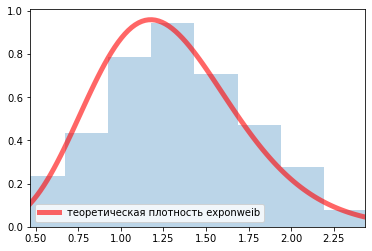

In [9]:
# ваш код тут
fig, ax = plt.subplots(1, 1)
ax.hist(sample, density=True, bins='auto', histtype='stepfilled', alpha=0.3)

x = np.linspace(exponweib.ppf(0.01, a, c),
                exponweib.ppf(0.99, a, c), 100)
ax.set_xlim([x[0], x[-1]])
ax.plot(x, exponweib.pdf(x, a, c), 'r-', lw=5, alpha=0.6,  label='теоретическая плотность exponweib')
ax.legend(loc='best')
plt.show()

In [10]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.3328486446221184
0.17898289071065893


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

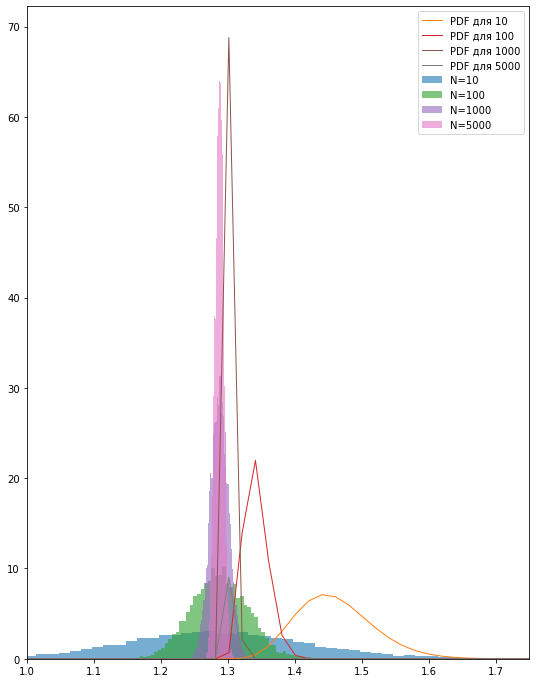

In [47]:
# ваш код тут
plt.figure(figsize=(9,12))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 5000]:
    
    means = []
    for i in range(10000):
         means.append(np.mean(exponweib(a, c).rvs(N)))
    
    # строим гистограмму выборочных средних
    plt.hist(means, density=True, bins='auto', histtype='stepfilled', alpha=0.6, label=f'N={N}')
    
    # строим теоретическое распределение выборочных средних
    exponweib_rv = sts.exponweib(a, c, loc=real_mean, scale=real_std/np.sqrt(N))    
    x = np.linspace(exponweib.ppf(0.01, a, c), exponweib.ppf(0.99, a, c), 100)
    plt.xlim([1, 1.75])
    plt.plot(x, exponweib_rv.pdf(x), label=f'PDF для {N}', alpha=1, linewidth=1)
    plt.legend(loc='best')
plt.savefig('pic.png')    
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

**Ввывод:** для распредения exponweib (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.exponweib.html) апроксимация распределения выборочного среднего работает достаточно плохо, так как среднии значения для построенной гистограммы выборочных средних и теоретического распределения выборочных средних не совпадают при увеличении количества выбираемых элементов

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [3]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

#### data_1 - таблица с клиентами, которые не ушли. 
#### data_2 - таблица с клиентами, которые ушли

In [5]:
data_1 = df[df['churn']==False]
N_1 = data_1.shape[0]
N_1

2850

In [6]:
data_2 = df[df['churn']==True]
N_2 = data_2.shape[0]
N_2

483

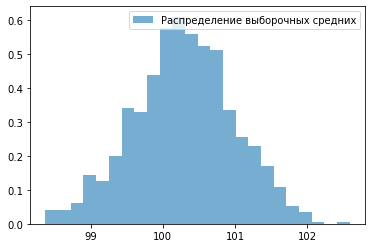

Медианное значение из сгенерированных выборочных средних равно 100.2975
Реальное среднее значение признака total day calls для клиентов, которые НЕ УШЛИ, равно 100.28315789473685
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.80131055815986, 101.25553154710332] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


In [73]:
# сгенерируем много выборочных средних
means_1=[]
for i in range(1000):
    means_1.append(np.random.choice(data_1['total day calls'], 800).mean())
    
# Построим гистограмму распределения выборочных средних    
plt.hist(means_1, density=True, bins='auto', histtype='stepfilled', alpha=0.6, label='Распределение выборочных средних')
plt.legend()
plt.show()

# Найдем среднее значение сгенерированной выборки 
real_mean = data_1['total day calls'].mean()
print(f'Медианное значение из сгенерированных выборочных средних равно {statistics.median(means_1)}')
print(f'Реальное среднее значение признака total day calls для клиентов, которые НЕ УШЛИ, равно {real_mean}')

# Построим доверительные интервалы для среднего значения total day calls
N = data_1.shape[0]
data = np.random.choice(data_1['total day calls'], N)

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * data_1['total day calls'].std() / np.sqrt(N-1), np.mean(data) + 1.96 * data_1['total day calls'].std() / np.sqrt(N-1)))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data_1['total day calls']),  np.std(data_1['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')))

**Вывод:** наиболее точный доверительный интервал получен с использованием явной формулы

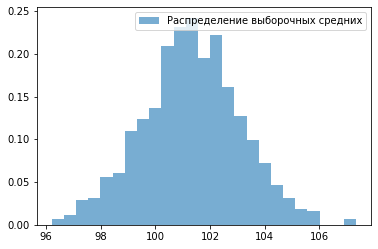

Медианное значение из сгенерированных выборочных средних равно 101.36666666666666
Реальное среднее значение признака total day calls для клиентов, которые УШЛИ, равно 101.33540372670808
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.42105366124557, 103.27459851266747] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [72]:
# сгенерируем много выборочных средних
means_2=[]
for i in range(1000):
    means_2.append(np.random.choice(data_2['total day calls'], 150).mean())
    
# Построим гистограмму распределения выборочных средних    
plt.hist(means_2, density=True, bins='auto', histtype='stepfilled', alpha=0.6, label='Распределение выборочных средних')
plt.legend()
plt.show()

# Найдем среднее значение сгенерированной выборки 
real_mean_2 = data_2['total day calls'].mean()
print(f'Медианное значение из сгенерированных выборочных средних равно {statistics.median(means_2)}')
print(f'Реальное среднее значение признака total day calls для клиентов, которые УШЛИ, равно {real_mean_2}')

N = data_2.shape[0] 
data = np.random.choice(data_2['total day calls'], N)

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * data_2['total day calls'].std() / np.sqrt(N-1), np.mean(data) + 1.96 * data_2['total day calls'].std() / np.sqrt(N-1)))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data_2['total day calls']),  np.std(data_2['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')))


**Вывод:** наиболее точный доверительный интервал получен с использованием метода zconfint_generic, так как количество сотрудников ушедших из компании невелико. 